In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temperatures = np.array([[300,700],[300,800],[300,800]])
families = ['li2s','nas2','libp']
data = ['./Results/MSD','./Results/FLOW','./Results/RADII']
compositions = [['/67-33','/70-30','/75-25'],['/33-67','/50-50','/67-33'],
                ['/38-31-31','/40-30-30','/45-275-275','/425-2875-2875'],]


# Plotting Max-Flow vs MSD

#### We try 3 different plots: MSD vs Flow, log(MSD) vs Flow and log(MSD) vs log(Flow).

## Max-Flow

#### For each value of Family and Temperature we have an array YY of max-flow results of shape: (4,9,3).
#### We have taken measurements across: 4 compositions, (3 quenches) x (3 axes), and 3 values of minimal radius.

The 3 values of radii are: min.rad.-0.1, min.rad., min.rad.+0.1, to check robustness. For plotting we only consider the central one.

## MSD

#### For each value of Family and Temperature we have an array X of MSD computations of shape: (4,9).
#### Note that: each time max-flow was computed along a direction (i.e. axes), also MSD was computed along the same axis.
#### We have thus made computations across: 4 compositions, (3 quenches) x (3 axes).


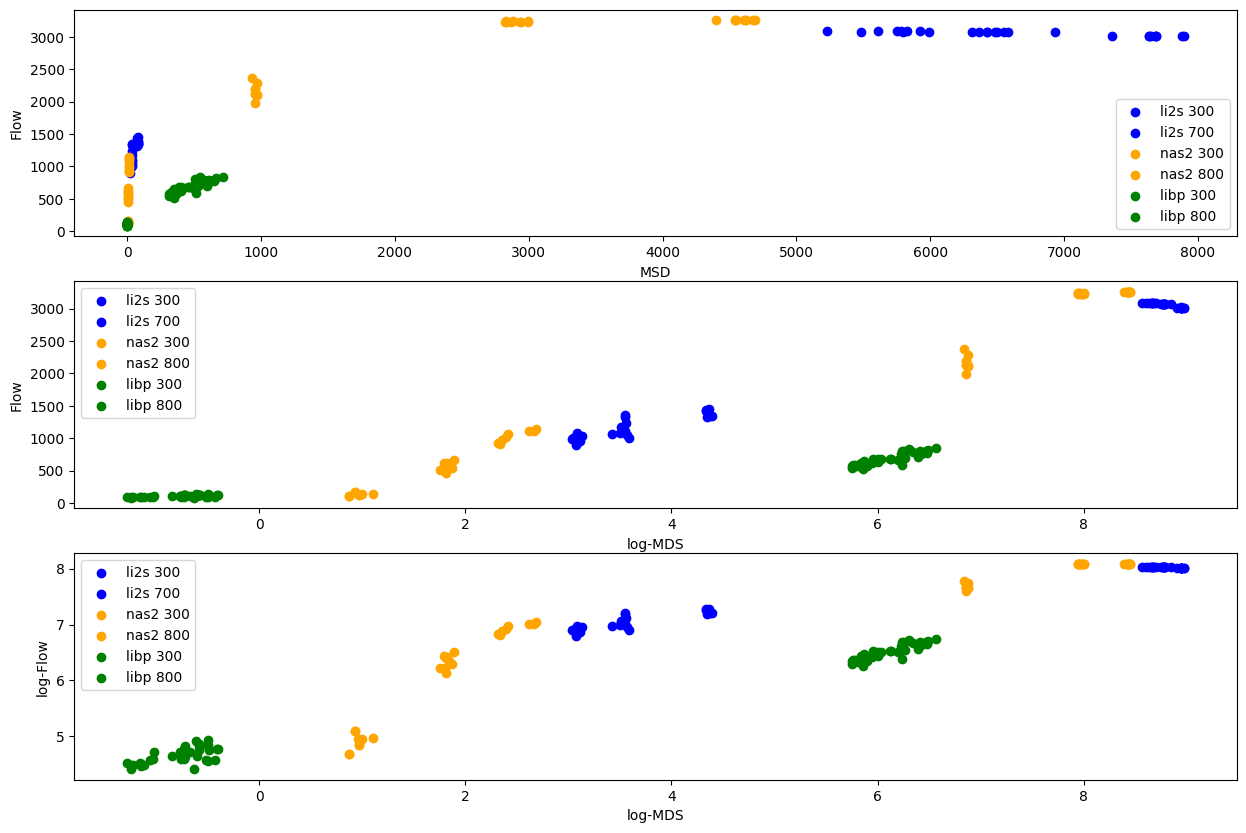

In [3]:
fig = plt.figure(figsize=(15,10))
    
ax_raw = fig.add_subplot(311,)
ax_log = fig.add_subplot(312,)
ax_loglog = fig.add_subplot(313,)

colors = ['blue','orange','green']

AXES = [ax_raw,ax_log,ax_loglog]

x = []
yy = []

for i,f in enumerate(families):
    c = colors[i]
    
    for t in temperatures[i]:
        
        XX = np.load(data[0]+'_'+f+'_'+str(t)+'.npy')
        YY = np.load(data[1]+'_'+f+'_'+str(t)+'.npy')

        x.append(XX)
        yy.append(YY)

        for j,ax in enumerate(AXES):
            
            ax.set_ylabel('Flow')
            ax.set_xlabel('MSD')
            
            X = np.copy(XX) # Collecting MSD for familiy "f", temperature "t"
                            # X[k,:] contains the 9 MSD for compositions[i][k]
                            # X[k,:] is ordered as quench -> coordinate axis/direction. That is:
                            # X[k,:]=[quench_1_x,quench_1_y,quench_1_z, quench_2_x, etc..]  

            if j>0:
                X = np.log(X)
                ax.set_xlabel('log-MDS')

            Y = YY[:,:,1] # Collecting Flows for familiy "f", temperature "t"
                          # Y[k,:] contains the 9 Flows for compositions[i][k]
                          # Y[k,:] is ordered as quench -> coordinate axis/direction. That is:
                          # Y[k,:]=[quench_1_x,quench_1_y,quench_1_z, quench_2_x, etc..]  
                             
            if j>1:
                Y = np.log(Y)
                ax.set_ylabel('log-Flow')
                    
            ax.scatter(X.flatten(),Y.flatten(),c=c,label=f+' '+str(t))
            
            
            
for ax in AXES:
    ax.legend()
    
    
x = np.concatenate(x)
yy = np.concatenate(yy,axis=0)

In [4]:
for i in range(3):
    print('\n',np.corrcoef(x.flatten(),yy[:,:,i].flatten())[0,1])
    print(np.corrcoef(np.log(x.flatten()),yy[:,:,i].flatten())[0,1])
    print(np.corrcoef(np.log(x.flatten()),np.log(yy[:,:,i].flatten()))[0,1])


 0.8460320148835798
0.8463695340166832
0.897617084010364

 0.8605946106674071
0.8458448159237278
0.9100455628628258

 0.8757171775558394
0.8379901189670492
0.9141300991311354
